# Principal Component Analysis

## import library

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [162]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

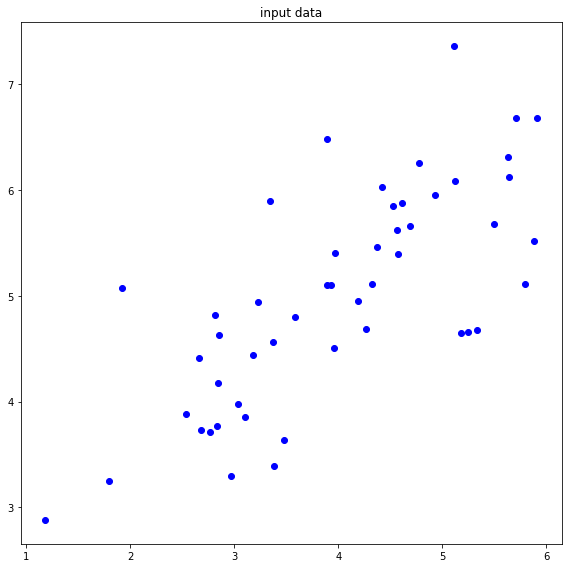

In [163]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [164]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    x = feature[:, 0]
    y = feature[:, 1]
    
    normal_x = (x - np.mean(x)) / np.std(x)
    normal_y = (y - np.mean(y)) / np.std(y)
    feature_normalize = np.vstack((normal_x,normal_y)).transpose()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [165]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [166]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    Sigma = np.matmul(np.transpose(feature), feature) / feature.shape[0]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [167]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    Sigma = compute_covariance(feature)
    s, u = np.linalg.eig(Sigma)
    
    comp_lst = s[s.argsort()][::-1][:2]
    
    principal_component_1 = comp_lst[0] * u[:, 0]
    principal_component_2 = comp_lst[1] * u[:, 1]

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [168]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    v = np.sqrt(sum(vector ** 2))
    norm_vector = vector / v
    projection = np.zeros((number_data, number_feature))

    t = np.dot(feature, vector) / v
    for i in range(len(t)):
        projection[i] = (norm_vector * t[i])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [169]:

(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

---

## functions for presenting the results

---

---

In [170]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [171]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s, u = np.linalg.eig(compute_covariance(feature))
    
    pc1 = max(s)
    pc1_vector = u[:, np.where(pc1 == s)]
    pc2 = max(np.delete(s, np.where(pc1 == s)))
    pc2_vector = u[:, np.where(pc2 == s)]
    
    o = np.array([[0, 0], [0, 0]])
    plt.scatter(x, y, s=25, color='blue', marker='o')
    plt.quiver(*o, pc1 * pc1_vector[0], pc1 * pc1_vector[1], angles='xy', scale_units='xy', scale=1, color='r')
    plt.quiver(*o, pc2 * pc2_vector[0], pc2 * pc2_vector[1], angles='xy', scale_units='xy', scale=1, color='g')
    plt.axis('auto')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [172]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s, u = np.linalg.eig(compute_covariance(feature))
    pc1 = max(s)
    pc1_vector = u[:, np.where(pc1 == s)]
    
    f1 = x * (pc1_vector[1] / pc1_vector[0])
    plt.scatter(x, y, color='blue', marker='o', s=25)
    plt.plot(x, f1.T, 'r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [173]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s, u = np.linalg.eig(compute_covariance(feature))

    pc1 = max(s)
    pc2 = max(np.delete(s, np.where(pc1 == s)))
    pc2_vector = u[:, np.where(pc2 == s)]
    
    f2 = x * (pc2_vector[1] / pc2_vector[0])
    plt.scatter(x, y, color='blue', marker='o', s=25)
    plt.plot(x, f2.T, 'r')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [174]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s, u = np.linalg.eig(compute_covariance(feature))
    pc1 = max(s)
    pc1_vector = u[:, np.where(pc1 == s)]
    
    f1 = x * (pc1_vector[1] / pc1_vector[0])
    plt.scatter(x, y, color='blue', marker='o', s=25)
    plt.scatter(projection1[:, 0], projection1[:, 1], color='green', s=25, zorder=1)
    plt.plot(x, f1.T, 'r', zorder=-1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [175]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s, u = np.linalg.eig(compute_covariance(feature))
    pc1 = max(s)
    pc2 = max(np.delete(s, np.where(pc1 == s)))
    pc2_vector = u[:, np.where(pc2 == s)]
    
    f2 = x * (pc2_vector[1] / pc2_vector[0])
    plt.scatter(x, y, color='blue', marker='o', s=25)
    plt.scatter(projection2[:, 0], projection2[:, 1], color='green', s=25, zorder=1)
    plt.plot(x, f2.T, 'r', zorder=-1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [2]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    s, u = np.linalg.eig(compute_covariance(feature))
    pc1 = max(s)
    pc1_vector = u[:, np.where(pc1 == s)]
    
    f1 = x * (pc1_vector[1] / pc1_vector[0])
    plt.scatter(x, y, color='blue', marker='o', s=25)
    plt.scatter(projection1[:, 0], projection1[:, 1], color='green', s=25, zorder=1)
    plt.plot(x, f1, 'r', zorder=-1)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [177]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    s, u = np.linalg.eig(compute_covariance(feature))
    pc1 = max(s)
    pc2 = max(np.delete(s, np.where(pc1 == s)))
    pc2_vector = u[:, np.where(pc2 == s)]
    
    f2 = x * (pc2_vector[1] / pc2_vector[0])
    plt.scatter(x, y, color='blue', marker='o', s=25)
    plt.scatter(projection2[:, 0], projection2[:, 1], color='green', s=25, zorder=1)
    plt.plot(x, f2, 'r', zorder=-1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


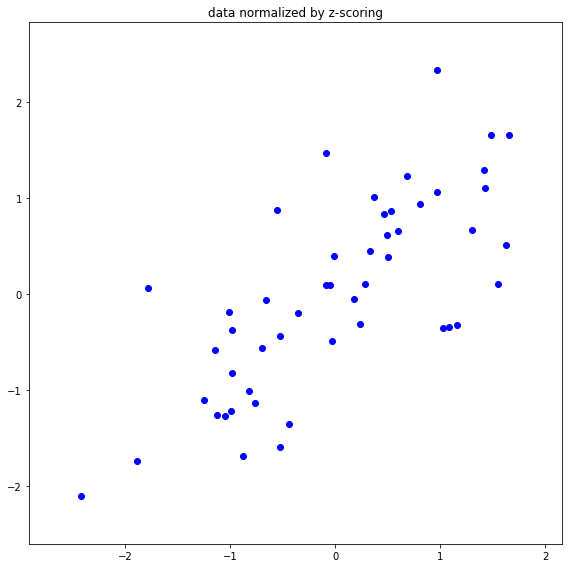

**************************************************
## [RESULT 02]
**************************************************


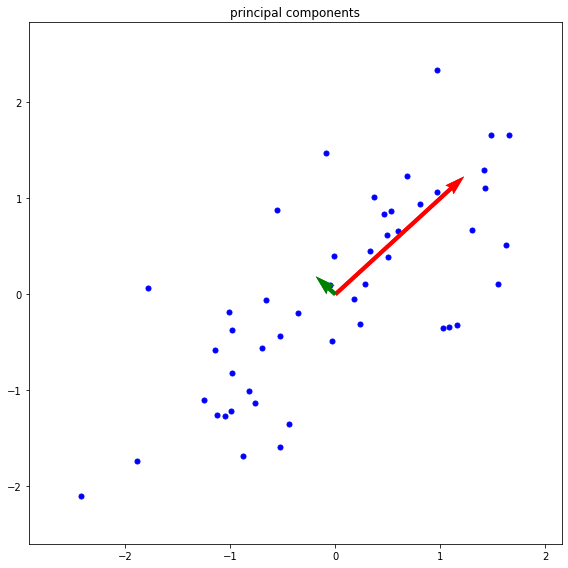

**************************************************
## [RESULT 03]
**************************************************


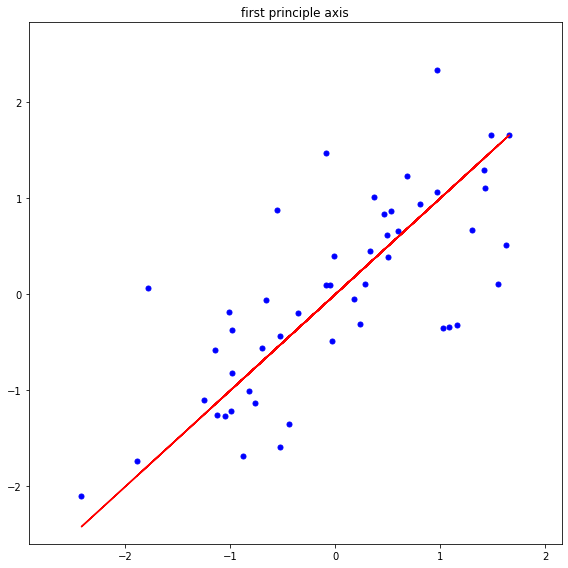

**************************************************
## [RESULT 04]
**************************************************


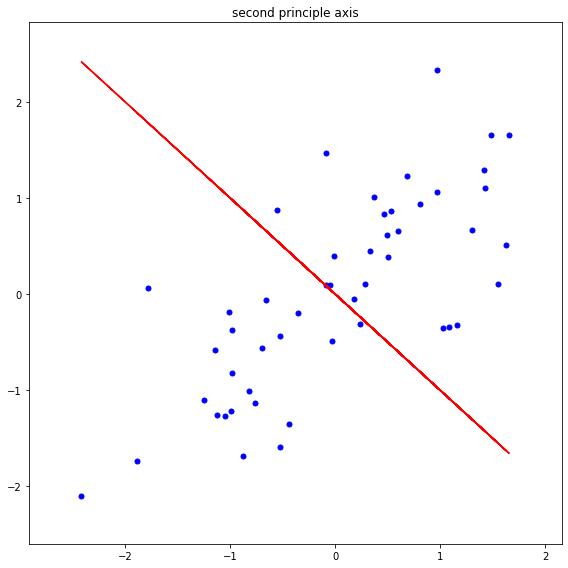

**************************************************
## [RESULT 05]
**************************************************


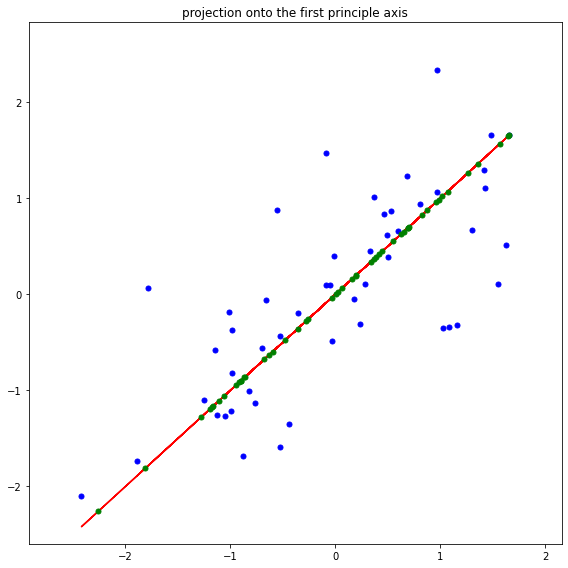

**************************************************
## [RESULT 06]
**************************************************


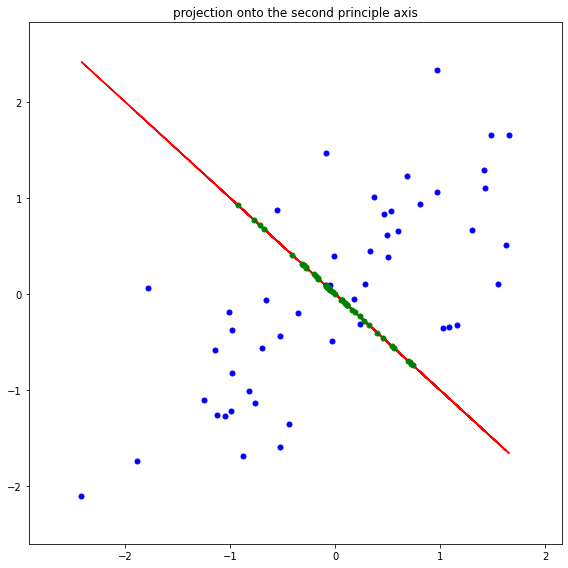

In [178]:
number_result = 6

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)